# **Housing price prediction using linear regression**
(*Regularised Gradient Descent and Regularised Normal equation*)

---





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


1.   *Delete unnecessary column*
2.   *Normalised the data with mean*


In [3]:
data = pd.read_csv('Housing Price data set.csv')
data=data.drop(['Unnamed: 0','driveway','recroom','fullbase','airco','prefarea', 'gashw'],axis=1)
mean = data.mean()[0]
stddev = data.std()[0]
data = (data - data.mean())/data.std()

data.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl
0,-0.978239,0.322732,0.047192,-0.568973,0.221501,0.357239
1,-1.109312,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,-0.697368,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,-0.285425,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,-0.266700,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [4]:
data.shape

(546, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    float64
 2   bedrooms  546 non-null    float64
 3   bathrms   546 non-null    float64
 4   stories   546 non-null    float64
 5   garagepl  546 non-null    float64
dtypes: float64(6)
memory usage: 25.7 KB


In [6]:
data.corr()

,price,lotsize,bedrooms,bathrms,stories,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.178178
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.043412
garagepl,0.383302,0.352872,0.139117,0.178178,0.043412,1.000000


In [7]:
data.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02
mean,-2.082177e-16,1.041088e-16,-2.147245e-16,-1.886972e-16,-3.904081e-17,1.301360e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.614880e+00,-1.614395e+00,-2.665085e+00,-5.689730e-01,-9.303041e-01,-8.037878e-01
25%,-7.114119e-01,-7.150148e-01,-1.308947e+00,-5.689730e-01,-9.303041e-01,-8.037878e-01
50%,-2.292504e-01,-2.537940e-01,4.719162e-02,-5.689730e-01,2.215010e-01,-8.037878e-01
75%,5.197384e-01,5.579547e-01,4.719162e-02,1.422433e+00,2.215010e-01,3.572390e-01
max,4.564278e+00,5.096368e+00,4.115606e+00,5.405244e+00,2.525111e+00,2.679293e+00


In [8]:
data.isnull()

,price,lotsize,bedrooms,bathrms,stories,garagepl
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
541,False,False,False,False,False,False
542,False,False,False,False,False,False
543,False,False,False,False,False,False
544,False,False,False,False,False,False


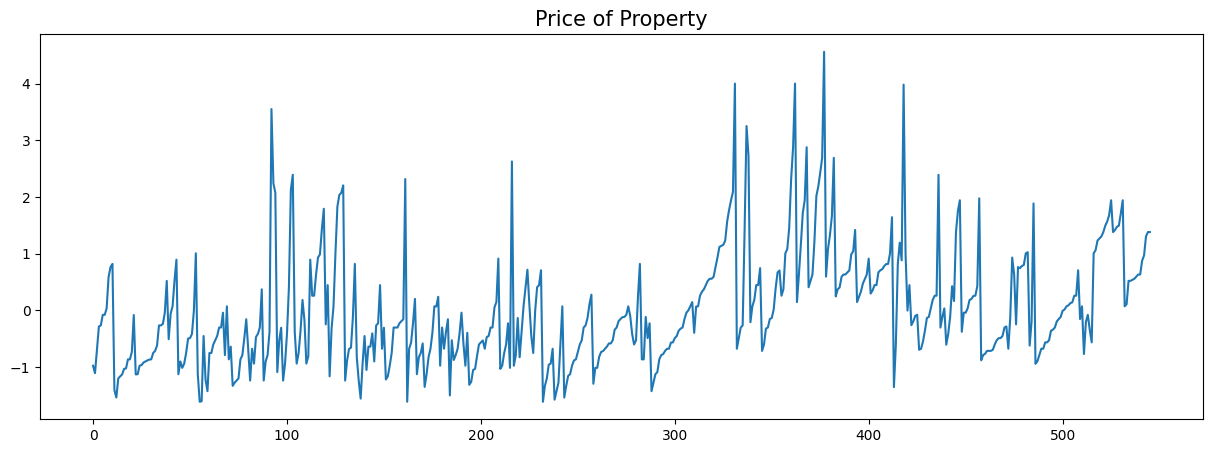

In [42]:
plt.figure(figsize=(15,5))
plt.plot(data['price'])
plt.title('Price of Property', fontsize=15)
plt.ylabel('')
plt.show()

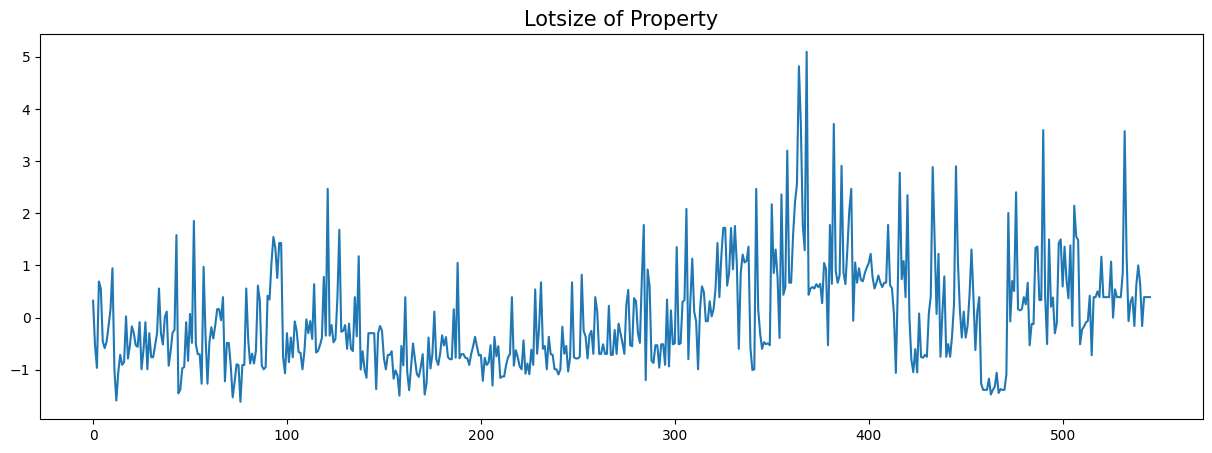

In [45]:
plt.figure(figsize=(15,5))
plt.plot(data['lotsize'])
plt.title('Lotsize of Property', fontsize=15)
plt.xlabel('')
plt.show()

In [46]:
data.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl
0,-0.978239,0.322732,0.047192,-0.568973,0.221501,0.357239
1,-1.109312,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,-0.697368,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,-0.285425,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,-0.266700,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [47]:
data.isnull().sum()


price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
garagepl    0
dtype: int64

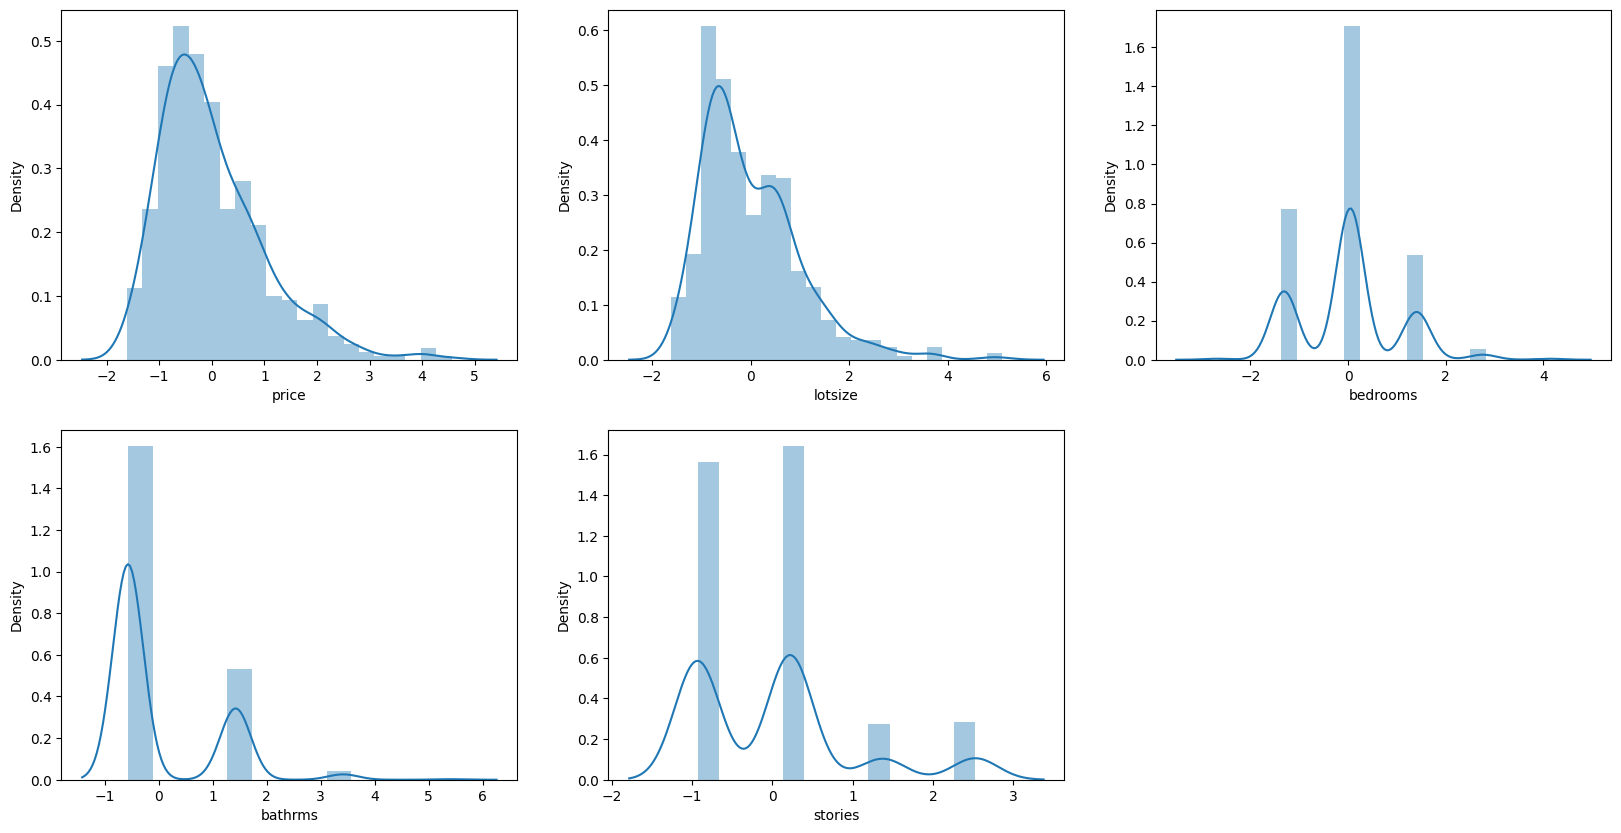

In [49]:
features = ['price', 'lotsize', 'bedrooms', 'bathrms', 'stories']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(data[col])
plt.show()

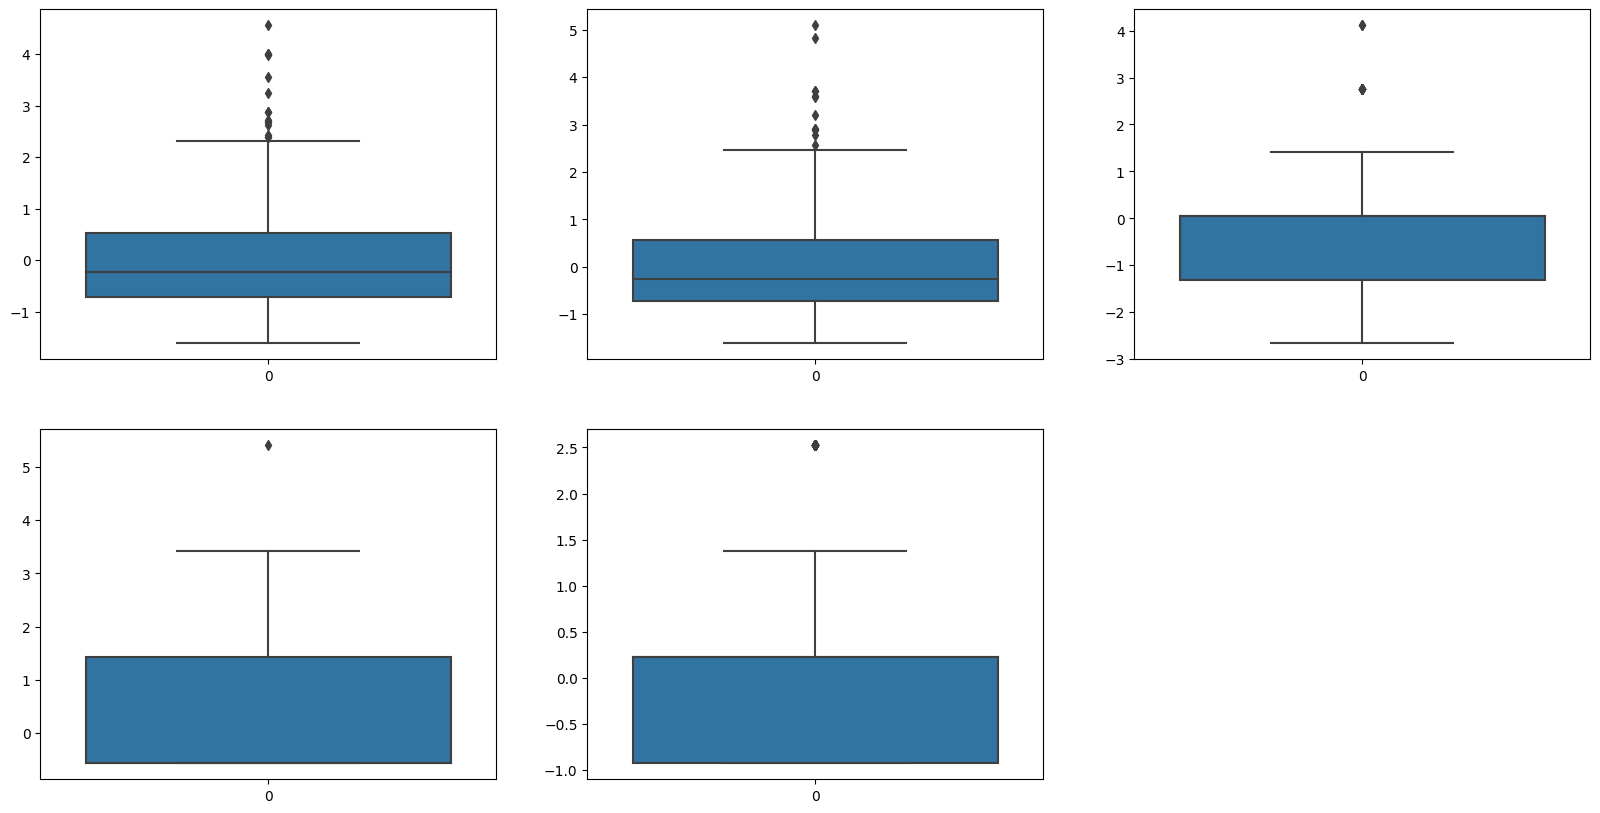

In [50]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(data[col])
plt.show()

*Separate out the Feature and Target matrices
and devide test and train data with 0.9 split ratio*


In [5]:

data=np.asarray(data)
Y=data[:,0:1]
X=data[:,1:]
one = np.ones((len(X),1))
X = np.concatenate((one,X),axis=1)
split_ratio = 0.9
split = int(split_ratio * X.shape[0])
X_test = X[split+1:,:]
X_train = X[:split+1, :]
Y_test = Y[split+1:,:]
Y_train = Y[:split+1, :]

4. *Compute cost function*
5. *denormalise price funcion*
6. *compute error function*
7. *plot graph function*

In [6]:
# helper Functions
def computeCost(X,y,theta,lam):
    tobesummed = np.power(((X.dot(theta.T))-y),2)+lam*np.sum(np.power(theta,2))
    return np.sum(tobesummed)/(2 * len(X))

def denormalise_price(price):
    global mean
    global stddev
    ret = price * stddev + mean
    return ret

def computeError(predicted, actual):
    error = 0
    for i in range(len(predicted)):
        error += abs(actual[i] - predicted[i]) / actual[i]
    error /= len(actual)
    return error[0]

def plotGraph(x,y,labelX='X',labelY='Y',title='X vs Y'):
  fig, ax = plt.subplots()
  ax.plot(x, y, 'r')
  ax.set_xlabel(labelX)
  ax.set_ylabel(labelY)
  ax.set_title(title)

7. *Gradient descent with regularisation to fint minimum theta*

In [7]:
# Gradient Descent
def gradientDescent(X,y,theta,iters,alpha, lam):
    lam_matrix = lam * np.ones(theta.shape)
    lam_matrix[0][0] = 0
    for i in range(iters):
        theta = theta*(1- lam_matrix / len(X)) - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)

    return theta

7. *Normal eqution function with regularisation to find minimum theta*

In [8]:
#Normal equation
def normalEquation(X,Y,lam):
    lam_matrix = lam * np.identity(X.shape[1])
    lam_matrix[0][0] = 0
    theta = np.linalg.inv(X.T.dot(X) + lam_matrix).dot(X.T).dot(Y)
    return theta


8. *Train the model with train data and predict the test data using gradient descent*
9. *compute the minimum error and lambda*
10. *plot error vs lambda graph*

min Error  :  13.960611355440056 %
Optimal Lambda :  24


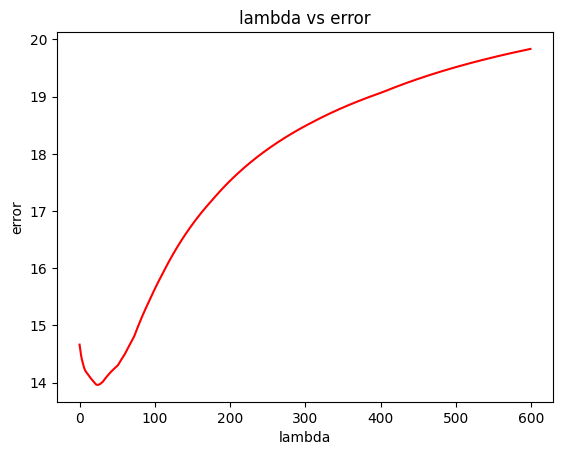

In [9]:
theta = np.zeros([1,X.shape[1]])
alpha = .1 #learning rate
iters = 500 #epoch
error_matrix = []
lam_range = 600 #maximam lamda
for lam in range(lam_range):
    g = gradientDescent(X_train,Y_train,theta,iters,alpha, lam)
    Cost = computeCost(X_train,Y_train,g,lam)

    Y_pred = X_test.dot(g.T)
    error = computeError(denormalise_price(Y_pred),denormalise_price(Y_test))
    error_matrix.append(error*100)
optimal_lambda = 0
min_error = 9999
for i in range(len(error_matrix)):
    if error_matrix[i] < min_error:
        optimal_lambda = i
        min_error = error_matrix[i]

print("min Error  : ", (min_error),'%')
print("Optimal Lambda : ", optimal_lambda)
plotGraph(np.arange(lam_range),error_matrix,'lambda','error','lambda vs error')

In [10]:
print('pred price =',denormalise_price(Y_pred[2][0]),'actual price =',denormalise_price(Y_test[2][0]))

pred price = 64257.576649503186 actual price = 58500.0


11. *Train the model with train data and predict the test data using Normal Equation*
12. *compute the minimum error and lambda*
13. *plot error vs lambda graph*

min Error :  13.432288061521582
Optimal Lambda :  311


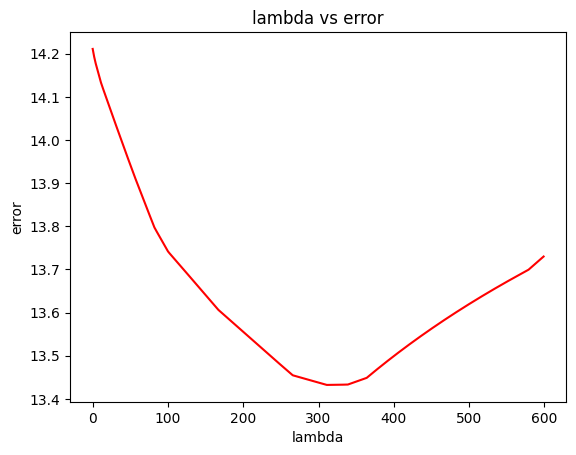

In [11]:
error_mat = []
lam_range = 600

for lam in range(lam_range):
    theta = normalEquation(X,Y,lam)
    Cost = computeCost(X_train,Y_train,theta.T,lam)
    Y_pred = X_test.dot(theta)
    error = computeError(denormalise_price(Y_pred),denormalise_price(Y_test))
    error_mat.append(error*100)

optimal_lambda = 0
min_error = 9999
for i in range(len(error_mat)):
    if error_mat[i] < min_error:
        optimal_lambda = i
        min_error = error_mat[i]
print("min Error : ", min_error)
print("Optimal Lambda : ", optimal_lambda)
plotGraph(np.arange(lam_range),error_mat,'lambda','error','lambda vs error')

In [12]:
print('pred price =',denormalise_price(Y_pred[2][0]),'actual price =',denormalise_price(Y_test[2])[0])

pred price = 57100.426317244695 actual price = 58500.0


Feature Engineering

Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [53]:
data['price'] = np.where(data['lotsize']%3==0,1,0)
data.head()


,price,lotsize,bedrooms,bathrms,stories,garagepl
0,0,0.322732,0.047192,-0.568973,0.221501,0.357239
1,0,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,0,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,0,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,0,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [60]:
data.groupby('price').mean()


,lotsize,bedrooms,bathrms,stories,garagepl
price,,,,,
0,1.110223e-16,-1.828005e-16,-2.035409e-16,-1.697869e-17,7.116814e-18


Data Splitting and Normalization

TEST SIZE 0.2

In [62]:
features = data[['lotsize', 'bedrooms', 'bathrms']]
target = data['price']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(
	features, target, test_size=0.2, random_state=2022)
print(X_train.shape, X_test.shape)


(436, 3) (110, 3)


Model Development and Evaluation

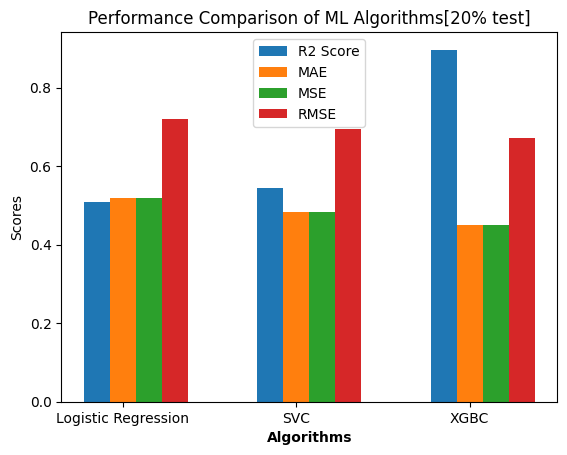

In [67]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming you have performance metrics for each algorithm[40%test]
r2_scores = [ 0.508, 0.544, 0.897] # Replace with your R2 scores
mae_scores = [0.520,0.483,0.450] # Replace with your MAE scores
mse_scores = [0.520,0.483 ,0.450] # Replace with your MSE scores
rmse_scores = [0.721 ,0.695,0.671] # Replace with your RMSE scores
# List of algorithms
algorithms = ['Logistic Regression', 'SVC', 'XGBC']
# Set the width of the bars
bar_width = 0.15
# Set the position of each bar on X-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
# Create bar plot
plt.bar(r2, r2_scores, width=bar_width, label='R2 Score')
plt.bar(r3, mae_scores, width=bar_width, label='MAE')
plt.bar(r4, mse_scores, width=bar_width, label='MSE')
plt.bar(r5, rmse_scores, width=bar_width, label='RMSE')
# Add labels to the chart
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(algorithms))], algorithms)
plt.ylabel('Scores')
29
plt.title('Performance Comparison of ML Algorithms[20% test]')
# Show legend
plt.legend()
# Show the plot
plt.show()

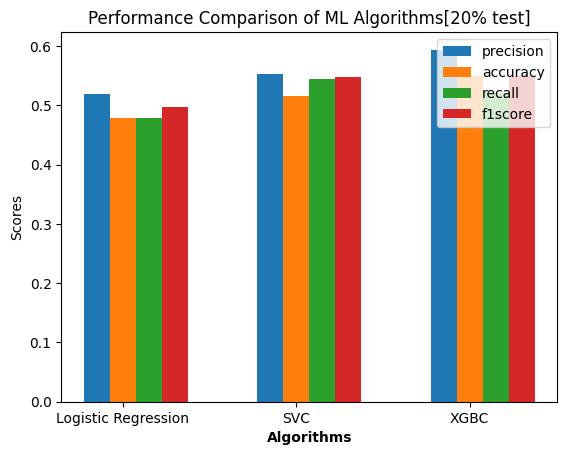

In [68]:
import matplotlib.pyplot as plt
import numpy as np
precision = [0.518672, 0.552529,0.593886]
accuracy = [0.479338, 0.516528,0.549586]
training_score = [0.508626, 0.544513, 0.897860]
f1_score = [0.498007,  0.548262,0.549586]
recall = [ 0.47892,0.544061,0.521072]
# List of algorithms
algorithms = ['Logistic Regression', 'SVC', 'XGBC']
# Set the width of the bars
bar_width = 0.15
# Set the position of each bar on X-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
# Create bar plot
plt.bar(r2, precision, width=bar_width, label='precision')
plt.bar(r3, accuracy, width=bar_width, label='accuracy')
plt.bar(r4, recall, width=bar_width, label='recall')
plt.bar(r5, f1_score, width=bar_width, label='f1score')
# Add labels to the chart
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(algorithms))], algorithms)
plt.ylabel('Scores')
plt.title('Performance Comparison of ML Algorithms[20% test]')
# Show legend
plt.legend()
# Show the plot
plt.show()

TEST SIZE 0.3

In [70]:
features = data[['lotsize', 'bedrooms', 'bathrms']]
target = data['price']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(
	features, target, test_size=0.3, random_state=2022)
print(X_train.shape, X_test.shape)


(382, 3) (164, 3)


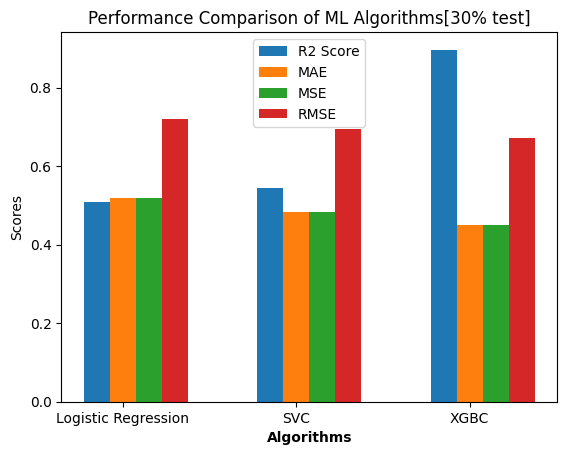

In [71]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming you have performance metrics for each algorithm[40%test]
r2_scores = [ 0.508, 0.544, 0.897] # Replace with your R2 scores
mae_scores = [0.520,0.483,0.450] # Replace with your MAE scores
mse_scores = [0.520,0.483 ,0.450] # Replace with your MSE scores
rmse_scores = [0.721 ,0.695,0.671] # Replace with your RMSE scores
# List of algorithms
algorithms = ['Logistic Regression', 'SVC', 'XGBC']
# Set the width of the bars
bar_width = 0.15
# Set the position of each bar on X-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
# Create bar plot
plt.bar(r2, r2_scores, width=bar_width, label='R2 Score')
plt.bar(r3, mae_scores, width=bar_width, label='MAE')
plt.bar(r4, mse_scores, width=bar_width, label='MSE')
plt.bar(r5, rmse_scores, width=bar_width, label='RMSE')
# Add labels to the chart
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(algorithms))], algorithms)
plt.ylabel('Scores')
29
plt.title('Performance Comparison of ML Algorithms[30% test]')
# Show legend
plt.legend()
# Show the plot
plt.show()

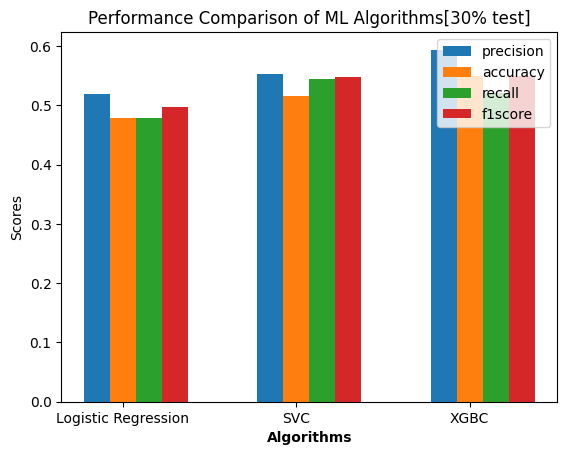

In [72]:
import matplotlib.pyplot as plt
import numpy as np
precision = [0.518672, 0.552529,0.593886]
accuracy = [0.479338, 0.516528,0.549586]
training_score = [0.508626, 0.544513, 0.897860]
f1_score = [0.498007,  0.548262,0.549586]
recall = [ 0.47892,0.544061,0.521072]
# List of algorithms
algorithms = ['Logistic Regression', 'SVC', 'XGBC']
# Set the width of the bars
bar_width = 0.15
# Set the position of each bar on X-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
# Create bar plot
plt.bar(r2, precision, width=bar_width, label='precision')
plt.bar(r3, accuracy, width=bar_width, label='accuracy')
plt.bar(r4, recall, width=bar_width, label='recall')
plt.bar(r5, f1_score, width=bar_width, label='f1score')
# Add labels to the chart
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(algorithms))], algorithms)
plt.ylabel('Scores')
plt.title('Performance Comparison of ML Algorithms[30% test]')
# Show legend
plt.legend()
# Show the plot
plt.show()

TEST SIZE 0.4

In [73]:
features = data[['lotsize', 'bedrooms', 'bathrms']]
target = data['price']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(
	features, target, test_size=0.4, random_state=2022)
print(X_train.shape, X_test.shape)


(327, 3) (219, 3)


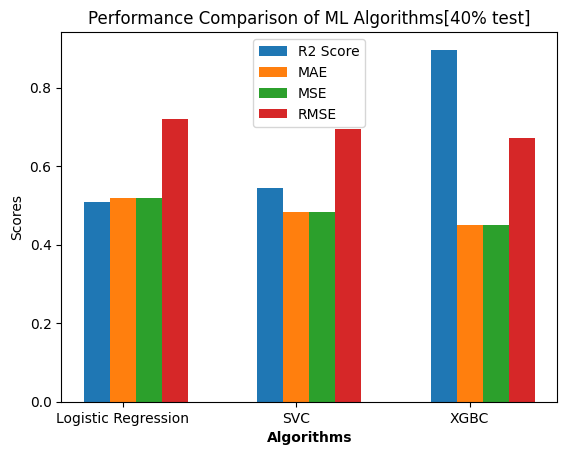

In [74]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming you have performance metrics for each algorithm[40%test]
r2_scores = [ 0.508, 0.544, 0.897] # Replace with your R2 scores
mae_scores = [0.520,0.483,0.450] # Replace with your MAE scores
mse_scores = [0.520,0.483 ,0.450] # Replace with your MSE scores
rmse_scores = [0.721 ,0.695,0.671] # Replace with your RMSE scores
# List of algorithms
algorithms = ['Logistic Regression', 'SVC', 'XGBC']
# Set the width of the bars
bar_width = 0.15
# Set the position of each bar on X-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
# Create bar plot
plt.bar(r2, r2_scores, width=bar_width, label='R2 Score')
plt.bar(r3, mae_scores, width=bar_width, label='MAE')
plt.bar(r4, mse_scores, width=bar_width, label='MSE')
plt.bar(r5, rmse_scores, width=bar_width, label='RMSE')
# Add labels to the chart
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(algorithms))], algorithms)
plt.ylabel('Scores')
29
plt.title('Performance Comparison of ML Algorithms[40% test]')
# Show legend
plt.legend()
# Show the plot
plt.show()

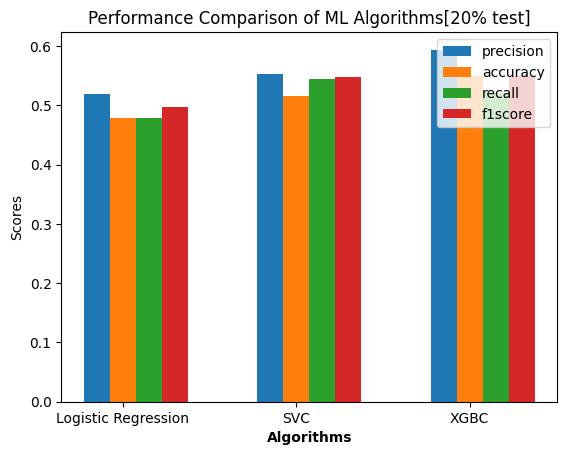

In [75]:
import matplotlib.pyplot as plt
import numpy as np
precision = [0.518672, 0.552529,0.593886]
accuracy = [0.479338, 0.516528,0.549586]
training_score = [0.508626, 0.544513, 0.897860]
f1_score = [0.498007,  0.548262,0.549586]
recall = [ 0.47892,0.544061,0.521072]
# List of algorithms
algorithms = ['Logistic Regression', 'SVC', 'XGBC']
# Set the width of the bars
bar_width = 0.15
# Set the position of each bar on X-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
# Create bar plot
plt.bar(r2, precision, width=bar_width, label='precision')
plt.bar(r3, accuracy, width=bar_width, label='accuracy')
plt.bar(r4, recall, width=bar_width, label='recall')
plt.bar(r5, f1_score, width=bar_width, label='f1score')
# Add labels to the chart
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(algorithms))], algorithms)
plt.ylabel('Scores')
plt.title('Performance Comparison of ML Algorithms[20% test]')
# Show legend
plt.legend()
# Show the plot
plt.show()